In [58]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [59]:
np.random.seed(42)

In [60]:
%env IEX_API_VERSION=iexcloud-sandbox
%env IEX_TOKEN=Tsk_5798c0ab124d49639bb1575b322841c4
%env ALPACA_API_KEY=PKQ9QXNTU9DD86IAWTJL
%env ALPACA_SECRET_KEY=YC1yh5LNOhfobsf1JKC2WwBNSOp/gZu9RjfRRx2w

env: IEX_API_VERSION=iexcloud-sandbox
env: IEX_TOKEN=Tsk_5798c0ab124d49639bb1575b322841c4
env: ALPACA_API_KEY=PKQ9QXNTU9DD86IAWTJL
env: ALPACA_SECRET_KEY=YC1yh5LNOhfobsf1JKC2WwBNSOp/gZu9RjfRRx2w


# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [61]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'
os.environ['IEX_TOKEN'] = os.getenv('IEX_TOKEN')

In [86]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

mid_date = end_date + timedelta(-365/2)
mid_date

datetime.datetime(2019, 10, 19, 10, 26, 29, 336038)

In [95]:




list_of_tickers = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set one year of time
end_date = datetime.now()
#mid_date = end_date + timedelta(-365/2)
start_date = end_date + timedelta(-30)

# Get 1 year's worth of historical data for AAPL
historical_data = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
'''
historical_data2 = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=mid_date,
    end=end_date,
    after=None,
    until=None,
).df

historical_data = pd.concat([historical_data1, historical_data2], axis=1)
'''

mid_date, start_date



(datetime.datetime(2019, 10, 19, 10, 43, 45, 661054),
 datetime.datetime(2020, 3, 19, 22, 44, 28, 762469))

In [97]:
historical_data

AGG                                        \
                             open     high       low    close    volume   
2019-11-22 00:00:00-05:00  112.89  112.900  112.7605  112.850   2233649   
2019-11-25 00:00:00-05:00  112.91  113.010  112.8900  112.980   2848536   
2019-11-26 00:00:00-05:00  113.11  113.159  113.0800  113.120   2104446   
2019-11-27 00:00:00-05:00  113.03  113.070  112.9600  112.995   1844546   
2019-11-29 00:00:00-05:00  113.01  113.020  112.8500  112.925   2123435   
...                           ...      ...       ...      ...       ...   
2020-04-13 00:00:00-04:00  117.09  117.170  116.5308  116.720  10178028   
2020-04-14 00:00:00-04:00  116.99  117.000  116.5850  116.740  10206316   
2020-04-15 00:00:00-04:00  117.03  117.305  116.7100  117.280   8177808   
2020-04-16 00:00:00-04:00  117.19  117.525  117.1900  117.380   8889846   
2020-04-17 00:00:00-04:00  117.52  117.620  117.0350  117.220   8858828   

                              SPY                                         
                             open      high       low   close     volume  
2019-11-22 00:00:00-05:00  310.90  311.2400  309.8500  311.00   32532889  
2019-11-25 00:00:00-05:00  311.98  313.3700  311.9800  313.35   37229034  
2019-11-26 00:00:00-05:00  313.41  314.2800  313.0600  314.02   30435576  
2019-11-27 00:00:00-05:00  314.61  315.4700  314.3700  315.46   34799247  
2019-11-29 00:00:00-05:00  314.86  315.1300  314.0600  314.27   24780428  
...                           ...       ...       ...     ...        ...  
2020-04-13 00:00:00-04:00  277.14  277.5100  271.4100  275.57  199751546  
2020-04-14 00:00:00-04:00  280.98  284.9000  275.5106  283.87  232819595  
2020-04-15 00:00:00-04:00  277.57  283.9407  275.4600  277.75  218487148  
2020-04-16 00:00:00-04:00  279.15  280.0300  275.7600  279.21  220969058  
2020-04-17 00:00:00-04:00  285.38  287.3000  282.4000  286.73  256722285  

[100 rows x 10 columns]

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [111]:
# set the list of tickers
list_of_tickers = ["SPY", "AGG"]

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for SPY & AGG
historical_data = get_historical_data(list_of_tickers, start_date, end_date, output_format='pandas')

historical_data

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2019-04-22  302.32  294.62  289.55  302.43   41981634  108.22  110.98  111.62   
2019-04-23  300.84  301.83  300.55  298.98   53347931  110.25  111.90  112.49   
2019-04-24  299.09  304.76  295.57  296.96   52503382  110.85  113.43  112.85   
2019-04-25  299.27  299.45  300.53  294.61   58971460  109.89  113.38  111.28   
2019-04-26  296.10  299.29  298.30  303.91   53352138  111.86  112.42  112.80   
...            ...     ...     ...     ...        ...     ...     ...     ...   
2020-04-13  287.94  284.44  280.17  288.52  115757217  118.16  120.78  117.96   
2020-04-14  287.12  298.30  286.63  290.87  138539067  117.81  119.00  117.57   
2020-04-15  287.48  293.76  281.00  281.49  123103347  121.82  117.95  118.47   
2020-04-16  279.27  293.65  284.18  282.10  135780469  120.99  122.03  118.86   
2020-04-17  289.53  295.30  284.60  291.94  147618523  117.52  120.00  119.25   

                             
             close   volume  
date                         
2019-04-22  112.35  5795528  
2019-04-23  111.08  3588850  
2019-04-24  109.50  3057563  
2019-04-25  109.90  2680167  
2019-04-26  109.29  2377883  
...            ...      ...  
2020-04-13  118.10  5746976  
2020-04-14  120.69  5660116  
2020-04-15  118.73  4498062  
2020-04-16  121.57  4921195  
2020-04-17  117.73  4998444  

[251 rows x 10 columns]

In [114]:
#Drop the extra columns
historical_data.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)

In [115]:
historical_data = historical_data.droplevel(1, axis=1)
historical_data.head()

,SPY,AGG
date,,
2019-04-22,302.43,112.35
2019-04-23,298.98,111.08
2019-04-24,296.96,109.50
2019-04-25,294.61,109.90
2019-04-26,303.91,109.29


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [116]:
# Calculate the daily roi for the stocks
daily_returns = historical_data.pct_change().dropna()
avg_daily_return = daily_returns.mean()
avg_daily_return

SPY    0.000257
AGG    0.000363
dtype: float64

In [119]:
# Calculate volatility
standard_deviation = daily_returns.std()
standard_deviation

SPY    0.028251
AGG    0.018772
dtype: float64

In [120]:
# Save the last day's closing price
closing_price = {}
for ticker in list_of_tickers:
    closing_price[ticker] = historical_data.iloc[-1][ticker]
closing_price

{'SPY': 291.94, 'AGG': 117.73}

In [121]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30

# Set the portfolio weights
weights = [0.60, 0.40]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [122]:
# Run the simulation of projecting stock prices for the next 30 year
for n in range(number_simulations):
    
    # Iterate through each ticker
    for ticker in list_of_tickers:
        
        # Initialize the simulated prices list with the last closing price
        simulated_prices = [closing_price[ticker]]
        
        # Simulate the returns for 252 days
        for i in range(number_records):

            # Calculate the simulated price using the last price within the list
            simulated_price = simulated_prices[-1] * (1 + np.random.normal(avg_daily_return[ticker], standard_deviation[ticker]))
            
            # Append the simulated price to the list
            simulated_prices.append(simulated_price)
        
        # Append a simulated prices of each simulation to DataFrame
        simulated_price_df[ticker] = pd.Series(simulated_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
     
    print(n)
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
    

# Print records from the DataFrame
portfolio_cumulative_returns.head()
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.976306,1.002256,1.013769,1.025005,0.978297,1.008362,0.992420,1.023479,0.986763,1.034196,...,1.004895,1.009263,0.991833,0.985539,0.955785,1.010044,0.993416,0.971047,1.047423,0.997118
2,1.003797,0.976201,1.035133,1.031471,0.966204,1.003376,1.023918,1.003035,1.000209,1.011780,...,0.967383,1.002400,1.011216,0.994911,0.956348,1.060399,0.961376,1.010313,1.055253,0.989102
3,0.998297,0.963366,1.055870,1.015938,0.968046,1.005815,1.029566,1.018094,1.012120,1.010531,...,0.968558,0.979622,1.012140,0.977091,0.979368,1.060371,0.978409,1.055628,1.054656,0.952428
4,1.007892,0.966814,1.044445,1.044752,0.956484,0.989955,1.040661,1.011302,1.000813,1.018566,...,1.006040,0.995533,0.986972,0.969137,0.992829,1.043889,0.986794,1.057967,1.093620,0.940065


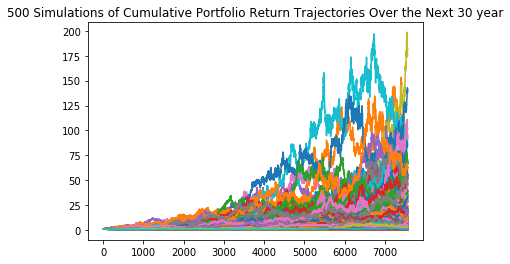

In [123]:
 # Visualize `500` simulations of the potential trajectories of the portfolio based on next 30 years
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 year"
#add titles
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [128]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1,:]
ending_cumulative_returns

0      33.878454
1       1.047916
2       2.126542
3       6.035502
4       2.639398
         ...    
495     1.473502
496     4.944415
497    17.504538
498     2.745009
499     0.860764
Name: 7560, Length: 500, dtype: float64

In [129]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns_20 = portfolio_cumulative_returns.iloc[20*252,:]
ending_cumulative_returns_20

0      22.645352
1       0.898538
2       1.667575
3       9.435372
4      20.342407
         ...    
495     1.037007
496     4.862520
497    14.357670
498     1.097895
499     0.886699
Name: 5040, Length: 500, dtype: float64

In [130]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     0.170608
0.95    39.395840
Name: 7560, dtype: float64

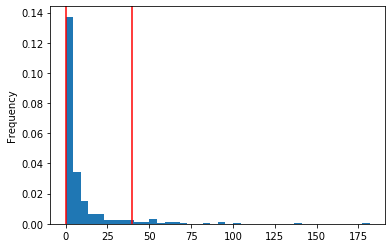

In [142]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=40)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [143]:
expected_cumulative_returns = ending_cumulative_returns.quantile(q=[.1,.5,.9])
expected_cumulative_returns

0.1     0.305052
0.5     2.707268
0.9    20.882210
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [162]:
 # Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
expected_portfolio_return = expected_cumulative_returns*initial_investment
expected_portfolio_return

0.1      6101.046528
0.5     54145.368305
0.9    417644.190252
Name: 7560, dtype: float64

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [164]:
expected_portfolio_return*0.04

0.1      244.041861
0.5     2165.814732
0.9    16705.767610
Name: 7560, dtype: float64

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [160]:
initial_investment = 30000
initial_investment
expected_portfolio_return = expected_cumulative_returns*initial_investment
expected_portfolio_return.round(2)

0.1      9151.57
0.5     81218.05
0.9    626466.29
Name: 7560, dtype: float64

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

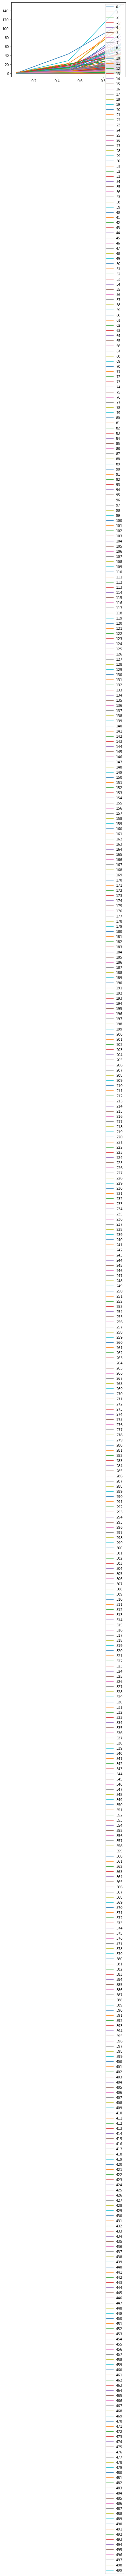

In [170]:
portfolio_cumulative_returns.quantile(q=[.05,.5,.95]).plot()